# TMDB 5000 Movie Dataset


## Background
"What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?"

"This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films"

# About Dataset

The Movie Database contains two datasets :

#### (Movie credits data):

budget

genres

homepage

id

keywords

original_language

original_title

overview

popularity

production_companies

production_countries

release_date

revenue

runtime

spoken_languages

status

tagline

title

vote_average

vote_count

#### mdb_5000_credits:

movie_id

title

cast

crew


# The libraries used
NumPy

pandas

Matplotlib (for data visualization)

# Question(s) for Analysis

1- Is run time of movies changed over the years?

2- What is the most 3 productive type?

3- what is the most popular 10 movies?

4- Which production company made the most movies?

5- What is the most money lost movie?

6- What is the movies that has the maximum runtime and in which year?

7- What is the shortest movie 

8- What kinds of properties are associated with movies that have high revenues?

9- Which year has the highest number of votes?

10- What is the relationship between revenues and the budget? 

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# upload data
df1= pd.read_csv(r"C:\Users\30759501\Desktop\Udacity Data Analyst\Project#2\Code\tmdb_5000_credits.csv")
df2= pd.read_csv(r"C:\Users\30759501\Desktop\Udacity Data Analyst\Project#2\Code\tmdb_5000_movies.csv")


## Data Wrangling
in this section i will explore the data to understand it 

In [3]:
df1.head(5)
# show the 5 first rows

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Rename column 'movie_id' to 'id'

In [4]:
df1.rename(columns= {'movie_id':'id'}, inplace=True)

# Here I renamed the 'movie_id' column to an 'id' to match it with the other dataset,
# Because later I will merge all the datasets with each other on id.

In [5]:
df1.head(5)
# show the 5 first rows

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.head(5)
# show the 5 first rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Marge two dataset to get one

In [7]:
df = pd.merge(df1, df2, on='id')
df.head()
# merge two dataset to get one, it will be easy to analyes

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
df.describe()

# The describe () method returns description of the data in the DataFrame.
# If the DataFrame contains numerical data, the description contains these information for each column:
# count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.
# min - the minimum value. 25% - The 25% percentile*

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


The minimum data is 0 which doesn't make sense as there is no movie with 0 budget or 0 runtime,
So I'll delete it later.

In [9]:
df.isnull().sum()

id                         0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64

homepage, tagline, runtime, release_date and overview have missing data

i will remove all missing record.

In [10]:
df.shape
# The shape property returns the number of rows and columns.
# The dataset contains 23 columns and 4803 rows

(4803, 23)

In [11]:
df.dtypes
# The dtyps property returns the type of each columns.

id                        int64
title_x                  object
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_y                  object
vote_average            float64
vote_count                int64
dtype: object

In [12]:
df.corr()
# Pandas dataframe.corr () is used to find the pairwise correlation of all columns in the Pandas Dataframe.

,id,budget,popularity,revenue,runtime,vote_average,vote_count
id,1.000000,-0.089377,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
budget,-0.089377,1.000000,0.505414,0.730823,0.269851,0.093146,0.593180
popularity,0.031202,0.505414,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.050425,0.730823,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.153536,0.269851,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.270595,0.093146,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.004128,0.593180,0.778130,0.781487,0.271944,0.312997,1.000000


- We can see that there’s a weak negative correlation between id and all coulms, because the ID number does not affect the other columns. Also, notice that the values on the diagonal are 1s, this is because each column is perfectly correlated with itself.


- We get ~0.73 as the correlation between the scores of revenue and budget. This indicates that the two columns highly correlated in a positive direction. That is, for a higher value in budget  we are observing a higher value in revenue and vice versa.

# Data Cleaning

## 1-Remove unnecessary attributes

In [13]:
df.drop(['homepage','keywords','overview','tagline','title_y','title_x','status'],axis = 1,inplace=True)

In [14]:
df.shape

(4803, 16)

## 2-Remove missing data 

In [15]:
df.isnull().sum()

id                      0
cast                    0
crew                    0
budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()
# no missind data

id                      0
cast                    0
crew                    0
budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

## 3-Remove duplicated

In [18]:
sum(df.duplicated())
#The pandas.DataFrame.duplicated () method is used to find duplicate rows in a DataFrame.
# It returns a boolean series which identifies whether a row is duplicate or unique.
# we can use sum() method with duplicated () method to get the sum of duplication.

0

There is no duplication

## 4-removing zeros from data

In [19]:
df.shape

(4800, 16)

In [20]:
df = df[~(df == 0).any(axis=1)]


In [21]:
df.describe()


,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,3227.000000,3.227000e+03,3227.000000,3.227000e+03,3227.000000,3227.000000,3227.000000
mean,44601.870778,4.067877e+07,29.051491,1.213181e+08,110.720793,6.313263,977.893090
std,74281.771931,4.439974e+07,36.169863,1.863361e+08,20.970364,0.859921,1414.538507
min,5.000000,1.000000e+00,0.019984,5.000000e+00,41.000000,2.300000,1.000000
25%,4954.500000,1.050000e+07,10.475904,1.704008e+07,96.000000,5.800000,178.000000
50%,11442.000000,2.500000e+07,20.415572,5.519828e+07,107.000000,6.300000,471.000000
75%,45256.000000,5.500000e+07,37.345773,1.463949e+08,121.000000,6.900000,1148.000000
max,417859.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [22]:
df.shape

(3227, 16)

# Exploratory Data Analysis


### 1- Is run time of movies changed over the years?

first we need to separate year into new column

In [23]:
df['release_date_copy']= pd.to_datetime(df['release_date'])
df['release_date_year']=df['release_date_copy'].dt.year
df

,id,cast,crew,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_date_copy,release_date_year
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009-12-10,2009
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007-05-19,2007
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015-10-26,2015
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012-07-16,2012
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012-03-07,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,"[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...","[{""credit_id"": ""52fe434ac3a36847f8049253"", ""de...",27000,"[{""id"": 35, ""name"": ""Comedy""}]",en,Clerks,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.4,755,1994-09-13,1994
4788,692,"[{""cast_id"": 8, ""character"": ""Divine / Babs Jo...","[{""credit_id"": ""52fe426bc3a36847f801d203"", ""de...",12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",en,Pink Flamingos,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.2,110,1972-03-12,1972
4792,36095,"[{""cast_id"": 3, ""character"": ""Kenichi Takabe"",...","[{""credit_id"": ""52fe45cc9251416c9103eb7b"", ""de...",20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",ja,キュア,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",7.4,63,1997-11-06,1997
4796,14337,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de...",7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",en,Primer,23.

#### Scatter plot
#####  Unlike other charts, that uses lines or bars this chart only uses markers or dots. This chart is between two points or variables. The first variable is independent, and the second variable is dependent on the first one. 

##### The main use of scatter charts is to draw the values of two series or variables and compare them over time or any other parameter. The independent variable also called the control parameter, is plotted along  x-axis. The dependant or measured variable is plotted along the Y-axis.



Text(0.5, 1.0, 'How did run time of movies changed over the years?')

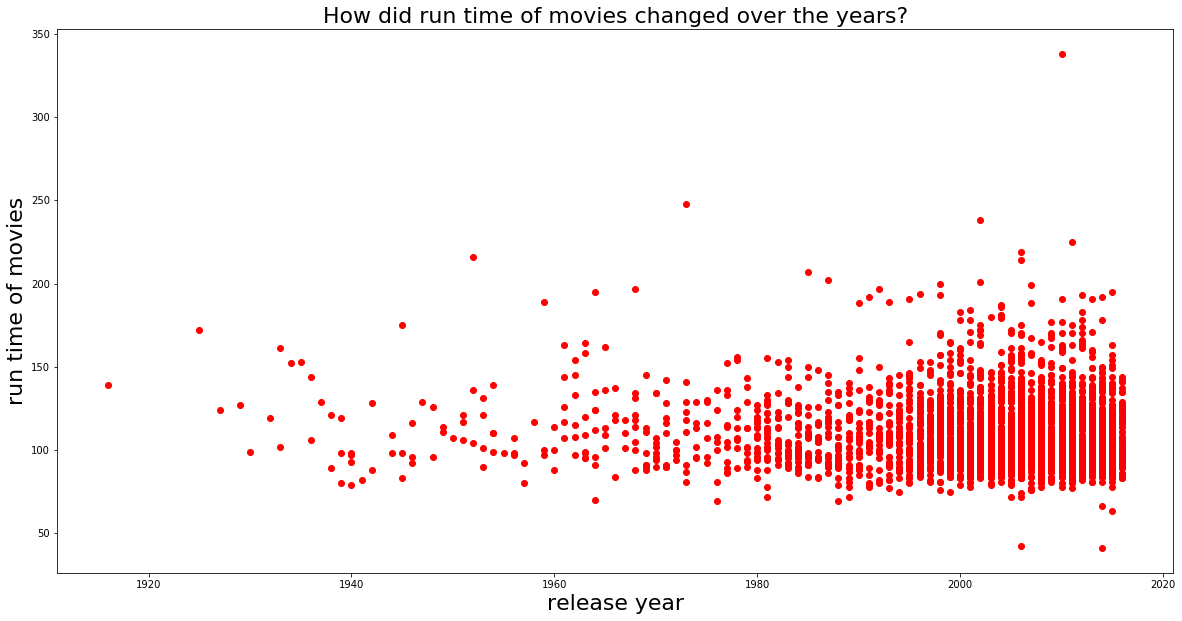

In [24]:
sort=df.sort_values('release_date_year', ascending=False)
plt.figure(figsize=(20,10))

plt.scatter(df['release_date_year'],sort['runtime'],color='red')
plt.xlabel("release year",fontsize=22)
plt.ylabel("run time of movies",fontsize=22)
plt.title("How did run time of movies changed over the years?",fontsize=22)

As you can see here in scatter plot the run time of movies concentrated between 75 and 150 minutes in a year 2000-2020.
Also the number of movies is increasing with the increase of years, it's a rather direct relationship.

### 2- What is the most productive type?

##### I used the value_counts () function to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. then i used head(1) to get the first one. 

In [25]:
df.genres.value_counts().head(1)

[{"id": 18, "name": "Drama"}]    203
Name: genres, dtype: int64

#### Drama is the most productive genre with 203 films, followed by comedy with 197 films and drama and romance with 96 films.

### 3- what is the most popular 10 movies?

##### A bar plot is one of the most common graphs useful to represent the numeric aggregation of data by rectangular bars for different categories.

Text(0.5, 1.0, 'the most popular 10 movies')

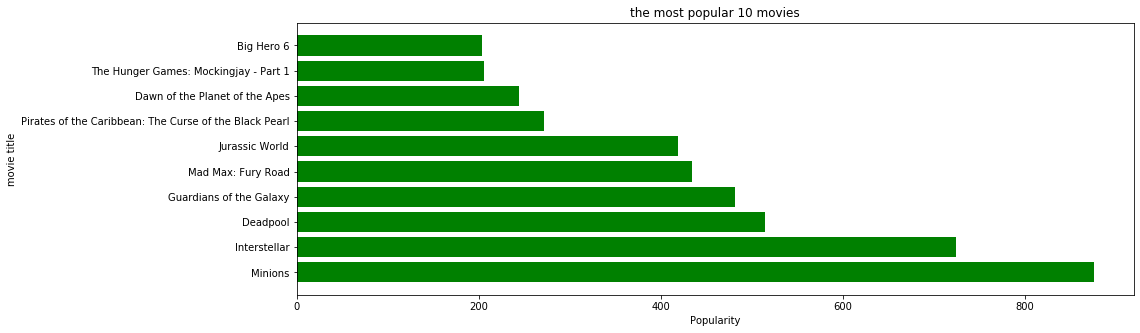

In [26]:
sort= df.sort_values('popularity', ascending=False)
plt.figure(figsize=(15,5))

plt.barh(sort['original_title'].head(10),sort['popularity'].head(10), color='green')
plt.xlabel("Popularity")
plt.ylabel("movie title")
plt.title("the most popular 10 movies")

#### The most popular movie is Minios, follow by Interstellar, Deadpool, Guardians of the Galaxy ... etc 

### 4- Which production company made the most movies?


##### I used the value_counts () function to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. then i used head(1) to get the first one. 

In [27]:
df.production_companies.value_counts().head(1)

[{"name": "Paramount Pictures", "id": 4}]    48
Name: production_companies, dtype: int64

#### "Paramount Pictures" is the most production company of movies.
#### it is Produced 48 films.


### 5- What is the most money lost movie? 

Convert data type of budget & revenue from object to integer

In [28]:
df['budget'].astype(int)
df['revenue'].astype(int)


0      -1507002209
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4773       3151130
4788       6000000
4792         99000
4796        424760
4798       2040920
Name: revenue, Length: 3227, dtype: int32

In [29]:
df.dtypes

id                               int64
cast                            object
crew                            object
budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date                    object
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
release_date_copy       datetime64[ns]
release_date_year                int64
dtype: object

Calculate the loss of money by subtracting the column of revenue from budget
than add it to the dataset 

In [30]:
money_lost=df.revenue-df.budget
money_lost

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4773       3124130
4788       5988000
4792         79000
4796        417760
4798       1820920
Length: 3227, dtype: int64

In [31]:
df['money_lost'] = money_lost
df.head(5)

,id,cast,crew,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_date_copy,release_date_year,money_lost
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009-12-10,2009,2550965087
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007-05-19,2007,661000000
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015-10-26,2015,635674609
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012-07-16,2012,834939099
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012-03-07,2012,24139100


##### I used sort_values() function to sorts a data frame in Ascending order for money_lost Column.

In [32]:
sort = df.sort_values("money_lost", axis = 0, ascending = True)[:1][['original_title','money_lost']]
sort

,original_title,money_lost
13,The Lone Ranger,-165710090


#### The most money lost movie is "The Lone Ranger" by 165710090 

### 6-what is the movies that has the maximum runtime and in which year?

In [33]:
import matplotlib.pyplot as plt

def MyGrpPlot(df, grpVar, yVar, stat='sum',show_data=False, num=10):

    data = df.groupby([grpVar])[yVar].agg(stat)
    data.plot(figsize=[15,5]);

    grpVar=grpVar.replace("_"," ")
    if isinstance(yVar,list):
        yVary=' & '.join([x.replace("_"," ") for x in yVar])
    
    else:
        yVar=yVar.replace("_"," ")
    
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(), fontsize=14, weight="bold")
    plt.xlabel(grpVar.title(), fontsize=12,weight="bold")
    plt.ylabel(f'{stat} {yVar}'.title(), fontsize=12, weight="bold")

    
    if show_data:
        display(data.head(num))

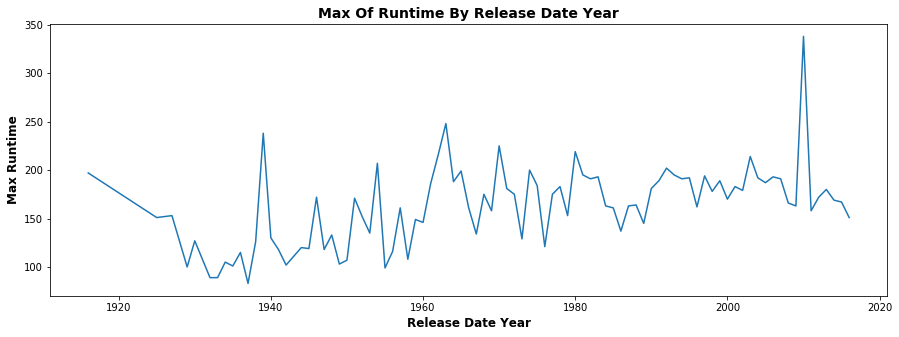

In [34]:
MyGrpPlot(df,'release_date_year','runtime', stat='max')

##### I also used sort_values() function to sorts a data frame in descending order for runtime Column to get the longest movie.

In [35]:
df.sort_values("runtime", axis = 0, ascending = False)[:1][['original_title','runtime','release_date_year']]

,original_title,runtime,release_date_year
2384,Carlos,338.0,2010


####  "Carlos"  has the maximum runtime it is 338 minutes in 2010

### 7-What is the shortest movie 


##### I used sort_values() function to sorts a data frame in ascending order for runtime Column to get the shortest movie.

In [36]:
df.sort_values("runtime", axis = 0, ascending = True)[:1][['original_title','runtime']]

,original_title,runtime
3626,Sea Rex 3D: Journey to a Prehistoric World,41.0


#### The shortest movie is "Sea Rex 3D: Journey to a Prehistoric World" 41.0 minutes

### 8- What kinds of properties are associated with movies that have high revenues?

##### Now use corr() function to find the correlation among the columns. We are only having four numeric columns in the Dataframe. The output Dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. As mentioned earlier, the correlation of a variable with itself is 1. For that reason, all the diagonal values are 1.00 .

In [37]:
corr=df.corr()
corr.style.background_gradient(cmap='Purples')

,id,budget,popularity,revenue,runtime,vote_average,vote_count,release_date_year,money_lost
id,1.000000,0.015819,0.180645,0.031826,-0.034371,-0.050815,0.109066,0.420419,0.033050
budget,0.015819,1.000000,0.431744,0.705306,0.229712,-0.035757,0.539997,0.267504,0.550147
popularity,0.180645,0.431744,1.000000,0.602122,0.182388,0.288189,0.749005,0.161608,0.588099
revenue,0.031826,0.705306,0.602122,1.000000,0.233236,0.188014,0.756143,0.147647,0.980004
runtime,-0.034371,0.229712,0.182388,0.233236,1.000000,0.386199,0.258101,-0.157875,0.210269
vote_average,-0.050815,-0.035757,0.288189,0.188014,0.386199,1.000000,0.380825,-0.192572,0.231512
vote_count,0.109066,0.539997,0.749005,0.756143,0.258101,0.380825,1.000000,0.173590,0.739146
release_date_year,0.420419,0.267504,0.161608,0.147647,-0.157875,-0.192572,0.173590,1.000000,0.098840
money_lost,0.033050,0.550147,0.588099,0.980004,0.210269,0.231512,0.739146,0.098840,1.000000


#### In the table of relations it is clear that the most properties associated with movies that have high revenues are money_lost, vote_count, budget and popularity

### 9-Which year has the highest number of votes?

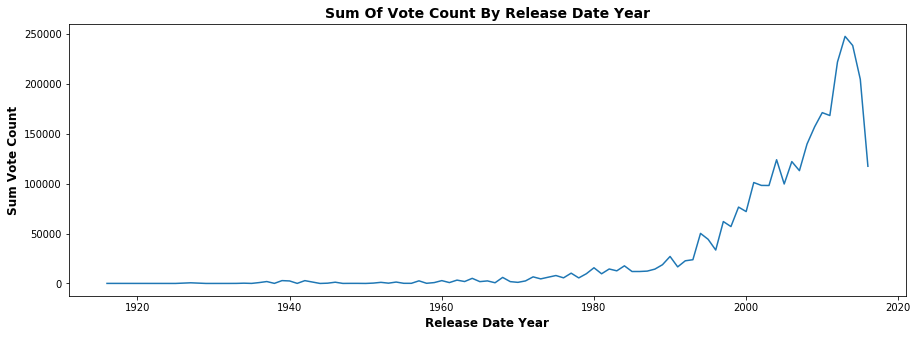

In [38]:
MyGrpPlot(df,'release_date_year','vote_count')

In [39]:
df_copy=df.groupby(['release_date_year']).sum()
df_copy.tail(3)

,id,budget,popularity,revenue,runtime,vote_average,vote_count,money_lost
release_date_year,,,,,,,,
2014,25558140,7017500000,8316.888714,24047236072,15009.0,856.0,238382,17029736072
2015,29680962,6392400003,7658.487656,22477338612,13469.0,757.4,204532,16084938609
2016,20153265,4593390000,3730.033509,14451226853,7997.0,440.6,117400,9857836853


In [40]:
sort= df_copy.sort_values('vote_count', ascending=False)
sort.head(1)

,id,budget,popularity,revenue,runtime,vote_average,vote_count,money_lost
release_date_year,,,,,,,,
2013,18087600,7954389300,5834.99278,23145629922,16931.0,964.4,247543,15191240622


#### 2013 has the highest number of votes by (247543) votes

### 10- What is the relationship between revenues and the budget? 


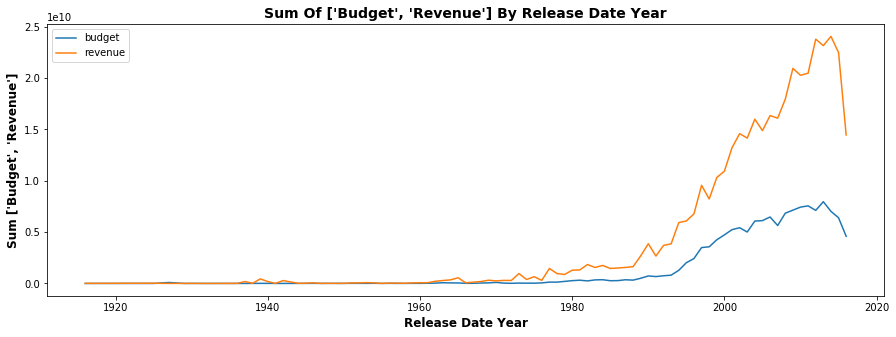

In [41]:
MyGrpPlot(df,'release_date_year',['budget','revenue'])

There is a positive correlation between budget and revenues,
as revenue increase in conjunction with the increase in the budget.(1961-2016)

# Conclusion

#### The limitation fot the data analysis over the given set are:
- we always find issues with the sample of data that we are working with, such as missing observations, data that appears to be inconsistent
- the release_date is date but in the dataset is appears as object.
- i wished the genres column more organize, so that it separated the id into another column.

#### After we analyzed the data set we can conclude clearly and concisely, that:

1-The run time of movies concentrated between 75 and 150 minutes in a year 2000-2020.
Also the number of movies is increasing with the increase of years, it's a rather direct relationship.

2-Drama is the most productive genre with 203 films, followed by comedy with 197 films and drama and romance with 96 films.

3-The most popular movie is Minios, follow by Interstellar, Deadpool and Guardians of the Galaxy.

4-"Paramount Pictures" is the most production company of movies with 48 films.

5-The most money lost movie is "The Lone Ranger" where it reached a loss of 165710090 USD.

6-"Carlos"  has the maximum runtime it is 338 minutes in 2010

7-The shortest movie is "Sea Rex 3D: Journey to a Prehistoric World" 41.0 minutes

8-The most properties associated with movies that have high revenues are money_lost, vote_count, budget and popularity.

9-2013 has the highest number of votes by (247543) votes.

10-There is a positive correlation between budget and revenues, as revenue increase in conjunction with the increase in the budget.(1961-2016)

